<a href="https://colab.research.google.com/github/risehi/data-analysis-colab-notebooks/blob/main/twitter_ms_wrangle_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/drive/MyDrive/twitter-data-ms/microsoft_tweets_data.csv")

In [3]:
df

,Timestamp,Tweets,Hashtags,Mentions
0,2024-06-18T19:30:00.000Z,When thinking about what matters to early-in-c...,NaN,NaN
1,2024-06-18T16:30:02.000Z,"With what he calls “super empathy,” Joao is a ...","['InclusionIsInnovation', 'DiversityAndInclusi...",NaN
2,2024-06-01T16:00:35.000Z,This Pride we invite you to learn more about t...,"['InclusionIsInnovation', 'Pride']",NaN
3,2024-05-30T19:01:47.000Z,Microsoft Copilot for Microsoft 365 helps you ...,['AI'],NaN
4,2024-05-30T16:30:00.000Z,The ability to clearly articulate your thought...,NaN,NaN
...,...,...,...,...
507,2024-05-28T16:30:01.000Z,"When Petrus joined the US Marines, he promised...",['InclusionIsInnovation'],NaN
508,2024-05-30T19:01:47.000Z,Microsoft Copilot for Microsoft 365 helps you ...,['AI'],NaN
509,2024-05-30T16:30:00.000Z,The ability to clearly articulate your thought...,NaN,NaN
510,2024-05-29T16:30:00.000Z,We partnered with \n@HerCampus\n to give you t...,NaN,['HerCampus']


In [4]:
unique_hashtags = set()
for index, row in df.iterrows():
    if pd.notna(row['Hashtags']):
        # extract hashtags without quotation marks stripping
        # (use them for comparison)
        hashtags = row['Hashtags'].strip('[]').split(',')
        unique_hashtags.update(hashtags)

# create columns for each unique hashtag
# strip characters for column names
for hashtag in unique_hashtags:
    # proper clean up
    clean_hashtag = hashtag.strip(" '\"")
    df[clean_hashtag] = df['Hashtags'].apply(lambda x: x.strip('[]').split(',').count(hashtag) if pd.notna(x) else 0)

In [5]:
df

,Timestamp,Tweets,Hashtags,Mentions,DiversityAndInclusion,InclusionIsInnovation,Pride,AI
0,2024-06-18T19:30:00.000Z,When thinking about what matters to early-in-c...,NaN,NaN,0,0,0,0
1,2024-06-18T16:30:02.000Z,"With what he calls “super empathy,” Joao is a ...","['InclusionIsInnovation', 'DiversityAndInclusi...",NaN,1,1,0,0
2,2024-06-01T16:00:35.000Z,This Pride we invite you to learn more about t...,"['InclusionIsInnovation', 'Pride']",NaN,0,1,1,0
3,2024-05-30T19:01:47.000Z,Microsoft Copilot for Microsoft 365 helps you ...,['AI'],NaN,0,0,0,1
4,2024-05-30T16:30:00.000Z,The ability to clearly articulate your thought...,NaN,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...
507,2024-05-28T16:30:01.000Z,"When Petrus joined the US Marines, he promised...",['InclusionIsInnovation'],NaN,0,1,0,0
508,2024-05-30T19:01:47.000Z,Microsoft Copilot for Microsoft 365 helps you ...,['AI'],NaN,0,0,0,1
509,2024-05-30T16:30:00.000Z,The ability to clearly articulate your thought...,NaN,NaN,0,0,0,0
510,2024-05-29T16:30:00.000Z,We partnered with \n@HerCampus\n to give you t...,NaN,['HerCampus'],0,0,0,0


In [6]:
# construct a dictionary with count of each hashtag for visualization
viz_data = {}
for hashtag in unique_hashtags:
    clean_hashtag = hashtag.strip(" '\"")
    viz_data[clean_hashtag] = df[clean_hashtag].sum()

In [7]:
viz_data

{'DiversityAndInclusion': 1,
 'InclusionIsInnovation': 130,
 'Pride': 2,
 'AI': 127}

In [8]:
# additonaly let's count NaN values in 'Hashtags' column and add it to the dict
nan_count = df['Hashtags'].isna().sum()
viz_data['NaN'] = nan_count

In [9]:
nan_count

255

In [10]:
sorted_data = dict(sorted(viz_data.items(), key=lambda item: item[1], reverse=True))

In [11]:
sorted_data

{'NaN': 255,
 'InclusionIsInnovation': 130,
 'AI': 127,
 'Pride': 2,
 'DiversityAndInclusion': 1}

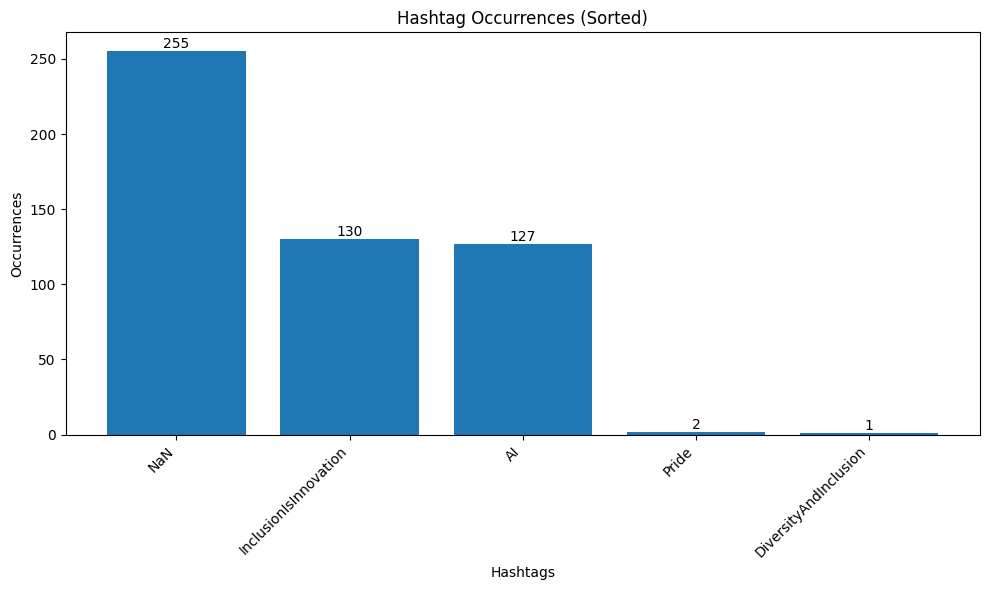

In [12]:
# create bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_data.keys(), sorted_data.values())
plt.xlabel('Hashtags')
plt.ylabel('Occurrences')
plt.title('Hashtag Occurrences (Sorted)')
plt.xticks(rotation=45, ha='right')

# add counts on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), va='bottom', ha='center')

plt.tight_layout()
plt.show()